<a href="https://colab.research.google.com/github/beast1912/Machine-Learning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y), 1)


In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
## here we get the scaled value of y
pred_y = regressor.predict(sc_X.transform([[6.5]]))


In [ ]:
##using inverse transform on the scaled value of y to get the original value
sc_y.inverse_transform(pred_y.reshape(-1, 1))
## using reshape because pred_y returns a 1d array and sc_y exepcts a 2d array

array([[170370.0204065]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

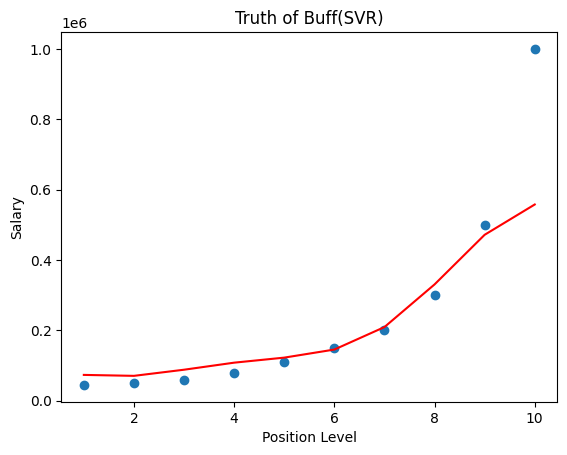

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'r')
plt.title('Truth of Buff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


## Visualising the SVR results (for higher resolution and smoother curve)

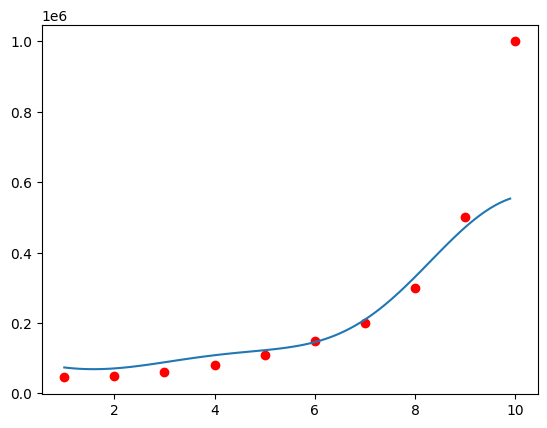

In [ ]:
transformed_X = sc_X.inverse_transform(X)
grid_X = np.arange(min(transformed_X), max(transformed_X), 0.1).reshape(-1, 1)
plt.scatter(transformed_X, sc_y.inverse_transform(y), color = 'r')
plt.plot(grid_X, sc_y.inverse_transform(regressor.predict(sc_X.transform(grid_X)).reshape(-1, 1)))

